In [3]:
import pandas as pd
import numpy as np

In [46]:
train_df=pd.read_table('paris_airbnb_train.csv',sep=',')
test_df=pd.read_table('paris_airbnb_test.csv',sep=',')

In [38]:
#  creer une liste de valeur de k
hyper_params=list(range(9,300))
# creer une liste vide
mse_values=[]
rmse_values=[]

 # adapter un modèle et faire des prédiction
from sklearn.neighbors import KNeighborsRegressor

   # calculer l'erreur quadratique moyenne
from sklearn.metrics import mean_squared_error

for k in range(len(hyper_params)):
    knn=KNeighborsRegressor(n_neighbors=hyper_params[k],algorithm='brute')

# données à utiliser pour l'apprntissage
    train_feature=train_df[['accommodates','bedrooms','bathrooms','number_of_reviews']]
    train_target=train_df['price'] # liste de valeurs contenant la valeur cible
# Passer les objets dans la méthode fit
    knn.fit(train_feature,train_target)
    # la méthode predict() ne prend qu'n seul paramètre
# c'est une matrice contenant les valeurs du set de test 
    four_prediction=knn.predict(test_df[['accommodates','bedrooms','bathrooms','number_of_reviews']])
 # la fonction mean_squared_error prend deux paramètres en entrée
   # un objet liste représentant les vraies valeurs
    # un objet liste représentant les valeurs prédites pour le modèle 
    four_mse= mean_squared_error(test_df['price'],four_prediction)
    four_rmse=four_mse**(1/2)
    mse_values.append(four_mse)
    rmse_values.append(four_rmse)

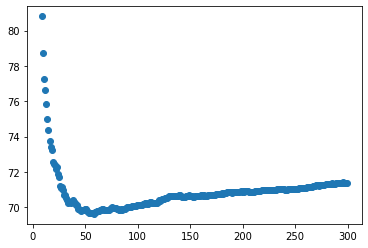

In [43]:
 #  affichier le résultat à travers un graphique
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(hyper_params,mse_values)

In [47]:
#  creer une liste de valeur de k
hyper_params=list(range(1,101))
# creer une liste vide
mse_values=[]
rmse_values=[]

 # adapter un modèle et faire des prédiction
from sklearn.neighbors import KNeighborsRegressor

   # calculer l'erreur quadratique moyenne
from sklearn.metrics import mean_squared_error

for k in range(len(hyper_params)):
    knn=KNeighborsRegressor(n_neighbors=hyper_params[k],algorithm='brute')
# données à utiliser pour l'apprntissage, tous sauf "price"
    train_features=train_df.drop(['price'],axis=1)
    train_target=train_df['price'] # liste de valeurs contenant la valeur cible
# Passer les objets dans la méthode fit
    knn.fit(train_features,train_target)
# la méthode predict() ne prend qu'n seul paramètre
# c'est une matrice contenant les valeurs du set de test 
    prediction=knn.predict(test_df.drop(['price'],axis=1))
# la fonction mean_squared_error prend deux paramètres en entrée
   # un objet liste représentant les vraies valeurs
    # un objet liste représentant les valeurs prédites pour le modèle 
    mse= mean_squared_error(test_df['price'],prediction)
    rmse=four_mse**(1/2)
    mse_values.append(mse)
    rmse_values.append(rmse)

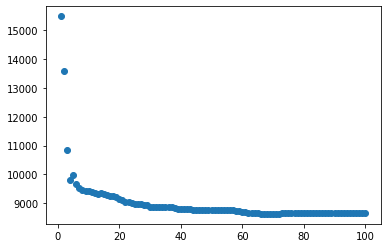

In [52]:
 #  affichier le résultat à travers un graphique
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(hyper_params,mse_values)

In [54]:
print(min(mse_values))

8631.118014378913


In [55]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 9 columns):
Unnamed: 0           6000 non-null int64
accommodates         6000 non-null float64
bedrooms             6000 non-null float64
bathrooms            6000 non-null float64
beds                 6000 non-null float64
price                6000 non-null float64
minimum_nights       6000 non-null float64
maximum_nights       6000 non-null float64
number_of_reviews    6000 non-null float64
dtypes: float64(8), int64(1)
memory usage: 422.0 KB


In [60]:
# crer une lsite des colonnes du data frames
two_features=['accommodates','bathrooms']
three_features=['accommodates','bathrooms','bedrooms']
# créer une liste d'hyper paramètre allant de 1 à 100
hyper_params=[x for x in range(1,100)]
# creer des listes vides
two_mse_values=list()
three_mse_values=list()
# creation de dictionnaires
two_hp_mse=dict()
three_hp_mse=dict()

#  prediction pour deux variables
for k in hyper_params:
    knn=KNeighborsRegressor(n_neighbors=k,algorithm='brute')
    knn.fit(train_df[two_features],train_df['price'])
    predictions=knn.predict(test_df[two_features])
    mse= mean_squared_error(test_df['price'],predictions)
    two_mse_values.append(mse)

two_lowest_mse=two_mse_values[0] # initialisation de la plus petite valeur de mse comme etant la première
two_lowest_k=1 #  on initialise de 1 parce que les k vont de 1 à 100

for k,mse in enumerate(two_mse_values):   #  dictionnaire contenant une paire de clé/valeur contenant 
    #  la plus petite valeur de k et de mse
    if mse < two_lowest_mse:
        two_lowest_mse=mse
        two_lowest_k=k+1 #  on ajoute 1 parce que l'incrementation se fait de 0 à 99

#  prediction pour trois variable
for k in hyper_params:
    knn=KNeighborsRegressor(n_neighbors=k,algorithm='brute')
    knn.fit(train_df[three_features],train_df['price'])
    predictions=knn.predict(test_df[three_features])
    mse= mean_squared_error(test_df['price'],predictions)
    three_mse_values.append(mse)

three_lowest_mse=three_mse_values[0] # initialisation de la plus petite valeur de mse comme etant la première
three_lowest_k=1  #  on initialise de 1 parce que les k vont de 1 à 100

for k,mse in enumerate(three_mse_values): #  dictionnaire contenant une paire de clé/valeur contenant 
    #  la plus petite valeur de k et de mse
    if mse < three_lowest_mse:
        three_lowest_mse=mse
        three_lowest_k=k+1    #  on ajoute 1 parce que l'incrementation se fait de 0 à 99

two_hp_mse[two_lowest_k]=two_lowest_mse
three_hp_mse[three_lowest_k]=three_lowest_mse
print(two_hp_mse)
print(three_hp_mse)

{94: 4948.546816114567}
{90: 4902.640327672482}
